In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import seaborn as sns

# prophet
from fbprophet import Prophet
# arima
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# data load

In [2]:
DATASET_PATH = os.path.join('/USER/team_project2/data')

In [3]:
train_df = pd.read_csv(os.path.join(DATASET_PATH, 'train_val_test.csv'))

In [4]:
val_df = pd.read_csv(os.path.join(DATASET_PATH, 'validate.csv'))

In [5]:
test_df = pd.read_csv(os.path.join(DATASET_PATH, 'test.csv'))

In [6]:
submission_df = pd.read_csv(os.path.join(DATASET_PATH, 'sample_submission.csv'))

In [7]:
train_df

,날짜,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,2020-01-01 00:00:00,83247,19128,2611,5161,1588,892,32263,1636,7938,...,1311,3482,11299,7072,1176,3810,748,3920,2133,3799
1,2020-01-01 01:00:00,89309,19027,3337,5502,1650,1043,35609,1644,9896,...,1162,3849,13180,8771,1283,3763,782,3483,2057,4010
2,2020-01-01 02:00:00,66611,14710,2970,4631,1044,921,26821,1104,9343,...,768,2299,7986,5426,1536,3229,491,2634,1526,3388
3,2020-01-01 03:00:00,53290,13753,2270,4242,1021,790,21322,909,10009,...,632,1716,5703,3156,1104,2882,431,2488,1268,3686
4,2020-01-01 04:00:00,52095,17615,2406,3689,1840,922,22711,1354,15497,...,875,2421,5816,2933,1206,2433,499,2952,1927,5608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,2020-05-24 19:00:00,314226,98345,10625,28618,8316,6684,141675,6619,23535,...,8254,16118,23304,14082,8447,21694,2180,15746,10903,21014
3779,2020-05-24 20:00:00,300001,87871,8226,22706,6981,5743,142933,6295,20953,...,5225,15297,21919,14526,7332,19732,1990,14096,10028,17787
3780,2020-05-24 21:00:00,304150,71126,6002,18317,4939,3779,133110,4781,15242,...,4072,12685,21135,14403,5443,16967,1359,11670,7963,14041
3781,2020-05-24 22:00:00,236751,44947,3575,11455,3135,2536,98582,3267,8849,...,2489,8093,14427,10914,3861,11397,859,7270,5194,8230


In [7]:
train_df['날짜'] = train_df['날짜'].astype('str')

In [8]:
train_df['시간'] = train_df['시간'].astype('str')

In [9]:
train_df['날짜'] = train_df['날짜'] + train_df['시간']

In [10]:
train_df = train_df.drop("시간", axis=1)

In [11]:
train_df

,날짜,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,202001010,83247,19128,2611,5161,1588,892,32263,1636,7938,...,1311,3482,11299,7072,1176,3810,748,3920,2133,3799
1,202001011,89309,19027,3337,5502,1650,1043,35609,1644,9896,...,1162,3849,13180,8771,1283,3763,782,3483,2057,4010
2,202001012,66611,14710,2970,4631,1044,921,26821,1104,9343,...,768,2299,7986,5426,1536,3229,491,2634,1526,3388
3,202001013,53290,13753,2270,4242,1021,790,21322,909,10009,...,632,1716,5703,3156,1104,2882,431,2488,1268,3686
4,202001014,52095,17615,2406,3689,1840,922,22711,1354,15497,...,875,2421,5816,2933,1206,2433,499,2952,1927,5608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,2020051719,311727,101285,10085,30637,10060,8749,148935,6801,26101,...,6726,15431,25597,14292,9300,22238,3786,16936,10729,20194
3275,2020051720,305354,91426,8607,26021,8095,7198,136503,6147,20759,...,5501,15378,24661,14747,8239,20604,3203,15018,9767,17962
3276,2020051721,306008,75113,6325,19933,5711,4494,129412,5134,14496,...,4216,12558,22781,14081,6392,17937,2447,12403,7825,14031
3277,2020051722,237447,49498,4209,12145,3891,2718,96698,3526,9363,...,2578,8870,16640,11066,4427,11955,1495,7507,5387,8889


In [14]:
train_df['날짜']=train_df['날짜'].apply(lambda _ : datetime.strptime(_,'%Y%m%d%H'))

In [15]:
test_df['날짜'] = test_df['날짜'].astype('str')
test_df['시간'] = test_df['시간'].astype('str')
test_df['날짜'] = test_df['날짜'] + test_df['시간']
test_df = test_df.drop("시간", axis=1)
test_df['날짜']=test_df['날짜'].apply(lambda _ : datetime.strptime(_,'%Y%m%d%H'))

In [16]:
val_df['날짜'] = val_df['날짜'].astype('str')
val_df['시간'] = val_df['시간'].astype('str')
val_df['날짜'] = val_df['날짜'] + val_df['시간']
val_df = val_df.drop("시간", axis=1)
val_df['날짜']=val_df['날짜'].apply(lambda _ : datetime.strptime(_,'%Y%m%d%H'))

# Prophet

In [8]:
train_df2 = train_df[['날짜','10']]

In [9]:
train_df2.columns = ['ds','y']

In [10]:
model = Prophet()

In [11]:
model.fit(train_df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -192.569


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8066.97     0.0260564       540.083           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8082.65     0.0040389       133.719      0.7486      0.7486      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       8083.15   0.000234826       202.852   4.099e-07       0.001      295  LS failed, Hessian reset 
     299       8086.37    0.00121096       376.147     0.08545           1      416   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     369       8087.37   9.78702e-05       137.875   8.859e-07       0.001      551  LS failed, Hessian reset 
     399       8087.67   5.89919e-05       60.4778      0.1901           1      595   
    Iter      log prob        ||dx||      ||grad||       alpha

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


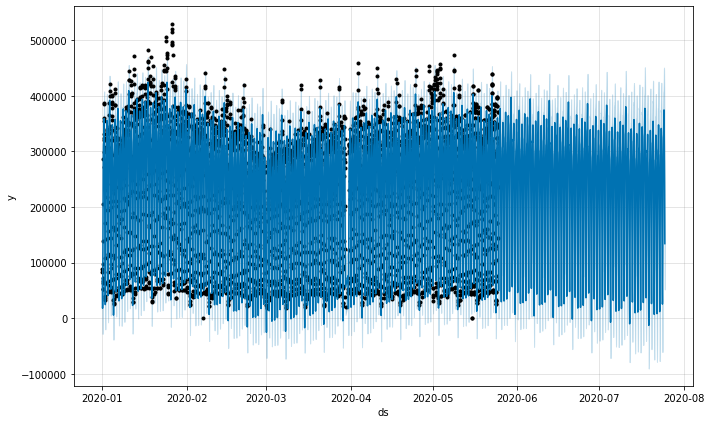

In [12]:
future = model.make_future_dataframe(periods = 1464, freq = 'H')
fcst = model.predict(future)
fig = model.plot(fcst)

In [13]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01 00:00:00,221430.530065,23829.372700,119822.204201,221430.530065,221430.530065,-149613.396202,-149613.396202,-149613.396202,-141214.415347,-141214.415347,-141214.415347,-8398.980855,-8398.980855,-8398.980855,0.0,0.0,0.0,71817.133863
1,2020-01-01 01:00:00,221533.764625,-12798.901820,86990.962576,221533.764625,221533.764625,-183431.463861,-183431.463861,-183431.463861,-176210.314345,-176210.314345,-176210.314345,-7221.149516,-7221.149516,-7221.149516,0.0,0.0,0.0,38102.300764
2,2020-01-01 02:00:00,221636.999185,-28013.342353,69505.165964,221636.999185,221636.999185,-203561.438519,-203561.438519,-203561.438519,-197518.483203,-197518.483203,-197518.483203,-6042.955316,-6042.955316,-6042.955316,0.0,0.0,0.0,18075.560666
3,2020-01-01 03:00:00,221740.233745,-25416.094306,69834.782215,221740.233745,221740.233745,-198743.169538,-198743.169538,-198743.169538,-193861.988602,-193861.988602,-193861.988602,-4881.180937,-4881.180937,-4881.180937,0.0,0.0,0.0,22997.064206
4,2020-01-01 04:00:00,221843.468304,8771.522397,105496.980935,221843.468304,221843.468304,-164293.854810,-164293.854810,-164293.854810,-160541.827734,-160541.827734,-160541.827734,-3752.027076,-3752.027076,-3752.027076,0.0,0.0,0.0,57549.613495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4906,2020-07-24 19:00:00,210778.869395,215809.030925,386746.661219,139836.707855,274805.218121,92020.077143,92020.077143,92020.077143,61764.132614,61764.132614,61764.132614,30255.944529,30255.944529,30255.944529,0.0,0.0,0.0,302798.946538
4907,2020-07-24 20:00:00,210761.996365,166197.440521,335797.523793,139690.382400,274736.881301,47064.678156,47064.678156,47064.678156,17459.768291,17459.768291,17459.768291,29604.909865,29604.909865,29604.909865,0.0,0.0,0.0,257826.674521
4908,2020-07-24 21:00:00,210745.123335,125935.102261,295438.357899,139565.200648,274668.544481,3263.416262,3263.416262,3263.416262,-25448.665666,-25448.665666,-25448.665666,28712.081928,28712.081928,28712.081928,0.0,0.0,0.0,214008.539597
4909,2020-07-24 22:00:00,210728.250304,89589.202217,251914.539563,139462.747761,274600.207661,-37188.638478,-37188.638478,-37188.638478,-64770.062542,-64770.062542,-64770.062542,27581.424064,27581.424064,27581.424064,0.0,0.0,0.0,173539.611826


In [14]:
pred = fcst.query("ds >= '2020-05-25' and ds <='2020-05-31 23:00'")
pred_yhat = pred.loc[:,["ds","yhat"]]

In [15]:
a = pred_yhat[["yhat"]]

In [16]:
pred_df = fcst.iloc[3447:3615]
pred_yhat = pred_df.loc[:,["ds","yhat"]]

In [17]:
pred_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3447,2020-05-25 00:00:00,235396.620646,55870.995866,149922.843783,235396.620646,235396.620646,-132860.361128,-132860.361128,-132860.361128,-141214.415347,-141214.415347,-141214.415347,8354.054219,8354.054219,8354.054219,0.0,0.0,0.0,102536.259518
3448,2020-05-25 01:00:00,235379.747615,19675.974559,117940.546271,235379.747615,235379.747615,-166319.904209,-166319.904209,-166319.904209,-176210.314345,-176210.314345,-176210.314345,9890.410136,9890.410136,9890.410136,0.0,0.0,0.0,69059.843406
3449,2020-05-25 02:00:00,235362.874585,-379.120135,96835.694731,235362.874585,235362.874585,-186271.314273,-186271.314273,-186271.314273,-197518.483203,-197518.483203,-197518.483203,11247.168930,11247.168930,11247.168930,0.0,0.0,0.0,49091.560312
3450,2020-05-25 03:00:00,235346.001555,5244.673279,97034.893129,235346.001555,235346.001555,-181450.280641,-181450.280641,-181450.280641,-193861.988602,-193861.988602,-193861.988602,12411.707961,12411.707961,12411.707961,0.0,0.0,0.0,53895.720914
3451,2020-05-25 04:00:00,235329.128524,42126.625481,139402.225302,235329.128524,235329.128524,-147168.036378,-147168.036378,-147168.036378,-160541.827734,-160541.827734,-160541.827734,13373.791356,13373.791356,13373.791356,0.0,0.0,0.0,88161.092146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,2020-05-31 19:00:00,232646.316702,245624.727358,337821.444321,230718.199024,234368.520102,60333.204347,60333.204347,60333.204347,61764.132613,61764.132613,61764.132613,-1430.928266,-1430.928266,-1430.928266,0.0,0.0,0.0,292979.521050
3611,2020-05-31 20:00:00,232629.443672,206365.877793,300405.648292,230680.521260,234370.900391,18200.614154,18200.614154,18200.614154,17459.768291,17459.768291,17459.768291,740.845863,740.845863,740.845863,0.0,0.0,0.0,250830.057826
3612,2020-05-31 21:00:00,232612.570641,164013.006234,257906.568964,230631.717987,234373.280681,-22622.065688,-22622.065688,-22622.065688,-25448.665666,-25448.665666,-25448.665666,2826.599978,2826.599978,2826.599978,0.0,0.0,0.0,209990.504953
3613,2020-05-31 22:00:00,232595.697611,122115.815695,222445.096055,230585.655996,234371.648419,-59965.868642,-59965.868642,-59965.868642,-64770.062543,-64770.062543,-64770.062543,4804.193901,4804.193901,4804.193901,0.0,0.0,0.0,172629.828969


In [12]:
for col in submission_df.columns[1:]:
    submission_df = submission_df.drop(col, axis=1)

for col in train_df.columns[1:].tolist():
    train_df2 = train_df[['날짜',col]]
    train_df2.columns = ['ds','y']
    
    model = Prophet()
    model.fit(train_df2)
    
    future = model.make_future_dataframe(periods = 1464, freq = 'H')
    forecast = model.predict(future)
    print(f'{col} Forecasting....')
    
    pred_df = forecast.iloc[3447:3615]
    pred_yhat = pred_df.loc[:,["ds","yhat"]]
    pred_yhat = pred_yhat[["yhat"]]
    pred_yhat = pred_yhat.reset_index()
    pred = pred_yhat.drop(["index"], axis=1)
    pred.rename(columns = {"yhat":col},inplace=True)
    
    submission_df = pd.concat([submission_df, pred], axis = 1)

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -192.569
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7854.51    0.00563295       670.916           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7868.72     0.0136703        606.94      0.3215           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     297       7872.99   0.000237854       170.017   3.151e-06       0.001      394  LS failed, Hessian reset 
     299          7873   7.91124e-05       60.2053           1           1      396   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325        7873.5   0.000747406       99.1646   6.525e-06       0.001      469  LS failed, Hessian reset 
     348       7873.67   5.15386e-05       77.5891   7.876e-07       0.001      541  LS failed, Hessian rese

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


10 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -211.427
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7951.49    0.00769575       246.891           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     144       7960.53    0.00012148       165.963   1.438e-06       0.001      221  LS failed, Hessian reset 
     199       7963.75      0.002104       52.5351           1           1      299   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7967.33   0.000733899       162.591      0.6897      0.6897      427   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7970.41    0.00240152       81.1515           1           1      557   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7972.66    0.00496997    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


100 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -101.303
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7999.04    0.00360337       215.877           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8076.57    0.00987939       760.015      0.3739           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8092.63   0.000299616       79.5235      0.3653      0.3653      385   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8103.17     0.0134921       211.374           1           1      512   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8118.45     0.0677638       526.646           1           1      635   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


101 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.3492
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8738.44     0.0631218       555.948      0.5397     0.05397      141   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8772.91      0.150541       1614.66      0.3316           1      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8797.43     0.0159464       259.212      0.6082      0.6082      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8806.69    0.00131203       124.562           1           1      497   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8810.59   0.000181283       71.9615      0.8142      0.8142      619   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


120 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -202.261
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7393.65     0.0122727       288.116           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7401.66    0.00119619       231.045       3.649           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     260       7402.43   5.63068e-05       78.0398   5.187e-07       0.001      371  LS failed, Hessian reset 
     299        7402.6    0.00152395       90.4538           1           1      419   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7403.84    0.00354849       80.9298      0.7938      0.7938      542   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7404.51   2.32288e-06    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


121 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -115.068
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7958.32    0.00389291       997.404           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7989.26    0.00219633       396.538      0.3407           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        8006.5    0.00136214        176.46       0.477       0.477      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8012.89      0.004448       212.134       0.326       0.326      480   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8025.32    0.00103399       138.141           1           1      614   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


140 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -174.437
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7575.01     0.0134531       197.449           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7595.14    0.00353264       93.7396      0.1936           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7601.91    0.00241206       368.588           1           1      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7605.01   0.000544273        131.39      0.4283           1      497   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     493       7608.11   0.000109929       68.1733   3.666e-07       0.001      648  LS failed, Hessian reset 
     499        7609.1    0.00141419    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


150 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -152.606
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8227.34     0.0236342       245.202           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8244.81     0.0137364       909.973      0.1451           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     297       8248.71   6.21016e-05       125.412   6.207e-07       0.001      418  LS failed, Hessian reset 
     299       8248.82    0.00187063       106.317           1           1      421   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8250.59   0.000463679       103.044           1           1      558   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     477       8251.13   4.73401e-05    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


160 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -92.9405
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        7337.1    0.00322193       225.012      0.4114      0.4114      145   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     187       7343.32   0.000131141       143.901   4.761e-07       0.001      294  LS failed, Hessian reset 
     199       7343.67   0.000198122       74.3922      0.4379           1      309   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        7346.1    0.00152154       104.511      0.7269     0.07269      432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     309       7346.97   0.000150157       184.972   1.253e-06       0.001      485  LS failed, Hessian reset 
     399       7348.04    0.00335373        94.088      0.4338           1      598   
    Iter      log pro

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


200 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -111.086
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8282.06     0.0275335        1670.7           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        8345.9     0.0267564       204.437           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        8398.7     0.0120206       461.721      0.8518      0.8518      379   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8414.73     0.0104615       501.175           1           1      509   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8427.42     0.0746449       359.651      0.7869      0.7869      634   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


201 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -177.672
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7809.75    0.00588647       153.004      0.9637      0.9637      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7832.79     0.0181276       153.576           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7840.12   0.000906107       93.6504      0.3965      0.3965      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       7840.28   4.57986e-05        75.156   4.902e-07       0.001      429  LS failed, Hessian reset 
     332       7840.42   0.000131095       154.911    2.05e-06       0.001      503  LS failed, Hessian reset 
     381        7841.6   6.71395e-05       80.6954   3.481e-07       0.001      630  LS failed, Hessian rese

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


251 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -105.675
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7855.77     0.0305091       590.276           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7951.37     0.0497497        812.76           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8003.39     0.0458689       550.438           1           1      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8024.03     0.0878983       585.211       4.925      0.4925      503   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8039.71    0.00487352       157.964           1           1      637   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


270 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -77.7446
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7845.33    0.00185734       386.723           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7890.63    0.00918091       143.443           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        7912.1    0.00336141       501.514           1           1      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        7935.8    0.00338651       189.619      0.5836     0.05836      490   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7950.51    0.00287391        247.71      0.4917      0.4917      621   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


300 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -117.063
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7677.91      0.008018       566.456           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7712.98    0.00659006       86.4188           1           1      269   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7732.26    0.00111073       148.836      0.8256      0.8256      391   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7734.15   0.000980428       213.102           1           1      511   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7737.83    0.00280637       72.1574           1           1      632   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


301 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -93.9426
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7868.15      0.023531       475.368      0.4938           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7957.82      0.086345       1651.62     0.08636           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8028.34     0.0878148       205.132           1           1      379   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        8037.4    0.00114763       516.352      0.1802           1      501   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8049.14     0.0203126       160.604           1           1      619   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


351 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -181.539
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7678.95     0.0143863       197.956           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7691.05   0.000325461       81.3667      0.2132      0.2132      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     296        7696.8   8.51325e-05       127.132   5.853e-07       0.001      414  LS failed, Hessian reset 
     299       7697.18    0.00289942        132.47           1           1      418   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     362       7698.37   6.00151e-05       76.4401   4.388e-07       0.001      543  LS failed, Hessian reset 
     399       7698.46   0.000139376       62.1303      0.6667      0.6667      587   
    Iter      log pro

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


352 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -218.826
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7274.14    0.00497183       164.031           1           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7278.64    0.00141204       77.0014           1           1      264   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     289       7279.39   0.000194918        85.901   2.706e-06       0.001      420  LS failed, Hessian reset 
     299        7279.4   4.39166e-05       53.9558           1           1      433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     343       7279.45   0.000235816       100.129   2.874e-06       0.001      527  LS failed, Hessian reset 
     375       7279.46    8.4586e-07       46.9165           1           1      576   
Optimization terminat

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


370 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -200.808
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7456.13    0.00479439       139.675           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7460.57     0.0011347       82.5162      0.6688      0.6688      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7462.56      0.001022        50.726      0.1567           1      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338       7462.85   6.05832e-05       79.0344   5.954e-07       0.001      469  LS failed, Hessian reset 
     399       7462.95    2.6519e-05       56.3674      0.2959      0.2959      548   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7463.08   0.000239684    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


400 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -132.531
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7929.56    0.00490303       126.158           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7952.36     0.0110801       305.514       1.657      0.1657      266   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7959.95     0.0146893       169.616       1.178      0.1178      390   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        7962.3    0.00230605       74.3496       2.638      0.2638      514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     495       7964.07   0.000244686       204.901   3.177e-06       0.001      685  LS failed, Hessian reset 
     499       7964.11   0.000522721    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


450 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -172.373
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7563.52    0.00308616       179.419      0.4096      0.4096      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7574.02     0.0117008       144.548     0.09423           1      271   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       7574.32   0.000117935       150.616   8.561e-07       0.001      319  LS failed, Hessian reset 
     299        7577.2    0.00199109        337.15           1           1      434   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325       7577.34   5.32609e-05       91.1527   7.001e-07       0.001      508  LS failed, Hessian reset 
     365       7577.39    0.00021035       85.3717   3.847e-06       0.001      603  LS failed, Hessian rese

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


500 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -111.307
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        7687.7     0.0176042       1037.43           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7757.47     0.0718196       461.379          10           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        7790.1    0.00369998       140.483        0.24           1      372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7802.02   0.000865039       652.849      0.3816      0.3816      505   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     491       7805.32   3.23575e-05       56.6795   3.745e-07       0.001      661  LS failed, Hessian reset 
     499       7805.34   0.000101518    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


550 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -79.7453
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6468.72     0.0053643       99.8246      0.3059           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6474.67    0.00295722       237.165           1           1      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6477.95    0.00185017        58.219      0.7232      0.7232      383   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6481.02    0.00140988       67.9475      0.4939      0.4939      510   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6483.03   0.000884182       69.8279         0.4           1      640   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


600 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -74.2765
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7816.04    0.00585822       440.335      0.9037      0.9037      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7849.74    0.00437586       879.768      0.3388      0.3388      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7883.49     0.0096617       382.959           1           1      385   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        7925.1      0.136676       771.307           1           1      505   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7949.64     0.0128662       938.301           1           1      624   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


650 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -113.036
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8012.13      0.121981       2175.23           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     192       8022.84   8.35003e-05       122.367   3.044e-07       0.001      272  LS failed, Hessian reset 
     199       8023.83    0.00226298       399.658      0.6222      0.6222      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     235       8026.51   5.20479e-05       93.1133   3.854e-07       0.001      371  LS failed, Hessian reset 
     267       8027.99   6.64671e-05       117.755   3.692e-07       0.001      464  LS failed, Hessian reset 
     278        8028.7    4.3737e-05       81.1599   7.361e-07       0.001      520  LS failed, Hessian reset 
     299       8028.97     0.0037247        67.831           1   

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


652 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -281.446
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      92       6989.33   0.000408879       79.2101   8.353e-06       0.001      168  LS failed, Hessian reset 
      99       6989.36   5.36454e-05       51.6533      0.2065      0.2065      177   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6989.54   0.000563788       60.5718       0.368           1      301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       6989.55   0.000219451       100.084   3.465e-06       0.001      353  LS failed, Hessian reset 
     259       6989.59   8.94851e-07       46.9137      0.2947           1      419   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


1000 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -145.893
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7493.38    0.00965373       254.117      0.3912           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7501.68    0.00170016       327.502      0.1987           1      263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224          7503   0.000141823       202.042    8.47e-07       0.001      350  LS failed, Hessian reset 
     262        7505.7   0.000181749       198.305   1.957e-06       0.001      443  LS failed, Hessian reset 
     299       7506.21   0.000318991       50.5518      0.8648      0.8648      490   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317       7506.27    6.3072e-05       85.2014   1.034e-06       0.001      561  LS failed, Hessian rese

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


1020 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -316.385
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7265.04   0.000471208       66.9744           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     119       7265.65   0.000104296       103.828   5.622e-07       0.001      217  LS failed, Hessian reset 
     199       7266.44   0.000394655       130.111      0.2801      0.2801      318   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       7266.48   1.20595e-05        68.897   1.794e-07       0.001      439  LS failed, Hessian reset 
     269       7266.48   3.32527e-07       60.1247      0.4319           1      453   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


1040 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -171.163
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7388.89      0.028502        901.31           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     191       7407.77   0.000131594       77.3785   4.242e-07       0.001      287  LS failed, Hessian reset 
     199       7408.42   0.000957425       246.346      0.3675      0.3675      296   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7412.47      0.146062       141.982           1           1      423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     389       7415.73   6.48408e-05       83.9374   9.524e-07       0.001      582  LS failed, Hessian reset 
     399       7415.77   0.000107509       44.6947       0.412           1      597   
    Iter      log pro

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


1100 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -153.675
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7260.97    0.00118217       103.188      0.7896      0.7896      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7264.08    0.00238372         225.6           1           1      272   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       7265.05   8.11136e-05       93.4225    1.04e-06       0.001      373  LS failed, Hessian reset 
     299       7265.11   3.76057e-05       49.8557      0.3285      0.8095      433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     323       7265.11   1.77034e-07       56.9366      0.6454      0.6454      468   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


1200 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.8432
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7467.06     0.0416471        1341.6           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        7553.4     0.0963161       1138.24      0.1169           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7603.21     0.0146825       235.943      0.2578           1      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7616.52    0.00143437       679.888      0.3644      0.3644      495   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7623.46   0.000820419       167.379     0.09071           1      624   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


1510 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -181.787
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7368.58     0.0685684       646.933           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7380.68   0.000812359       95.7774      0.7486      0.7486      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7383.63   0.000788221        111.81       0.538       0.538      372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     398       7384.56   7.36884e-05       101.374   8.702e-07       0.001      534  LS failed, Hessian reset 
     399       7384.56   2.64602e-05       61.0931           1           1      535   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7384.66   2.40116e-06    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


2510 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -169.808
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6995.39     0.0373264       426.896           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7008.45    0.00969675       241.846      0.4052           1      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207          7009   7.71174e-05        86.148   8.967e-07       0.001      306  LS failed, Hessian reset 
     266       7010.97    0.00010421       103.947   1.421e-06       0.001      420  LS failed, Hessian reset 
     299       7011.38    0.00170831       104.827      0.4246      0.4246      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     320       7011.81   0.000274874       225.441   2.015e-06       0.001      527  LS failed, Hessian rese

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


3000 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -269.846
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6865.34    0.00501071       205.384      0.3772           1      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        6871.2   0.000106228       58.6212      0.3334           1      263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223       6871.73   9.26333e-05       69.7358   5.958e-07       0.001      337  LS failed, Hessian reset 
     299        6873.2    0.00132317       97.7665      0.9582      0.9582      433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     370       6874.17    9.2251e-05       50.6955   5.346e-07       0.001      567  LS failed, Hessian reset 
     399       6874.22   0.000255466        64.144           1           1      609   
    Iter      log pro

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


4510 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -251.198
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7199.46    0.00309824       102.354           1           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7205.34   0.000314175        70.169       1.667      0.1667      266   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7209.79   0.000191203       89.5498      0.7575      0.7575      384   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7210.43   0.000113802        90.388      0.3017           1      516   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     422       7210.53   0.000265281        213.37   2.772e-06       0.001      583  LS failed, Hessian reset 
     499       7210.66      0.001293    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


5510 Forecasting....


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -278.472
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7184.72     0.0130793       141.317           1           1      141   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7187.34   0.000319772       74.9162           1           1      267   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       7187.45   8.50664e-05       67.7678   4.753e-07       0.001      322  LS failed, Hessian reset 
     299       7188.88    0.00192145       116.493        0.11           1      432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     300       7188.88   9.97944e-05       118.645   8.567e-07       0.001      468  LS failed, Hessian reset 
     399       7190.09   8.74945e-05        96.377      0.1818           1      592   
    Iter      log pro

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


6000 Forecasting....


In [13]:
submission_df

,timestamp,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200525_0,91538.119323,18387.847980,1450.525810,4202.854672,1522.530093,1156.258847,32242.260097,1221.150914,3018.402748,...,1143.576689,3676.106662,7069.884129,6113.512070,1436.231457,4509.573132,554.352548,3356.914843,2346.647486,3329.218851
1,20200525_1,55982.338652,10803.702916,859.295209,2625.888381,956.642016,824.999141,18515.403288,742.337265,1896.857951,...,658.964143,2164.044318,3922.394840,3589.200032,930.803213,3058.007842,440.299136,2329.255211,1486.760093,2032.939790
2,20200525_2,34412.270954,6117.429759,470.700130,1972.501351,250.998951,504.676811,12211.794084,395.577711,1261.525802,...,133.912013,1040.378459,1478.120933,1657.441637,823.646001,2078.993658,193.442043,863.659150,579.155104,823.570803
3,20200525_3,38091.029457,8025.413576,563.041706,2523.422451,-33.763774,417.571319,16334.922610,399.073628,1472.913178,...,-23.453183,1182.357740,1912.890610,1701.061624,1035.080243,2060.211320,27.687012,358.104535,440.288313,901.644212
4,20200525_4,71569.777843,18527.382210,1315.371274,4308.928901,708.021719,789.026946,30869.962483,923.238182,2619.276406,...,594.593160,3309.827013,6629.250667,4630.879595,1387.736881,3444.571924,224.640023,2408.657773,1782.658095,3235.031504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,20200531_19,291381.627278,87782.880669,8458.513332,23728.700532,8232.273541,6224.685180,117274.222180,5607.208943,16327.176548,...,6563.812829,15573.078616,23471.274112,19473.775579,6613.067542,19622.162780,2488.763395,18536.598649,11347.785819,18977.116746
164,20200531_20,247688.204464,66265.582599,5862.379745,17157.048359,5674.906617,4335.726757,97877.924658,4240.479197,11808.592404,...,4436.503812,12674.930952,18816.294157,16764.323702,5200.701439,14915.285377,1718.939367,13363.819207,8063.462628,13252.760997
165,20200531_21,205441.260271,48098.508576,3931.884215,12233.616520,3563.080266,2808.022860,80199.090448,3087.961911,8229.498775,...,2784.327684,9657.212431,14048.738170,13634.650388,4075.602604,10921.488511,1020.229885,8467.242918,5311.159389,8513.630303
166,20200531_22,166542.260077,35295.108915,2756.032741,8890.271641,2311.644668,1870.629622,63756.710667,2267.432549,5871.383195,...,1843.147190,7150.760437,10415.201464,10832.999863,3127.633352,8022.295961,604.824600,5310.777629,3669.732921,5665.084895


In [14]:
submission_df.to_csv('prophet_pred2.csv', index=False)

# ARIMA

In [36]:
submission_df2 = pd.read_csv(os.path.join(DATASET_PATH, 'sample_submission.csv'))

In [37]:
for col in submission_df2.columns[1:]:
    submission_df2 = submission_df2.drop(col, axis=1)

In [38]:
submission_df2

,timestamp
0,20200525_0
1,20200525_1
2,20200525_2
3,20200525_3
4,20200525_4
...,...
163,20200531_19
164,20200531_20
165,20200531_21
166,20200531_22


In [44]:
predict_ls = []
for col in train_df.columns[1:]:
    fit = sm.tsa.statespace.SARIMAX(train_df[col],order=(1, 1, 1),seasonal_order=(1,1,1,12)).fit()
    predict = fit.predict(start = 3447, end = 3614,dynamic=True).tolist()
    predict_ls.append(predict)
    submission_df2[col] = predict

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18061D+01    |proj g|=  1.85309D-01


 This problem is unconstrained.



At iterate    5    f=  1.17489D+01    |proj g|=  1.53320D-02

At iterate   10    f=  1.17433D+01    |proj g|=  1.25200D-02

At iterate   15    f=  1.17358D+01    |proj g|=  4.55889D-03

At iterate   20    f=  1.17357D+01    |proj g|=  1.59535D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   1.595D-05   1.174D+01
  F =   11.735699238269584     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07739D+01    |proj g|=  9.00015D-02

At iterate    5    f=  1.07482D+01    |proj g|=  1.76613D-03

At iterate   10    f=  1.07475D+01    |proj g|=  4.93072D-03

At iterate   15    f=  1.07472D+01    |proj g|=  5.07338D-05

At iterate   20    f=  1.07472D+01    |proj g|=  3.20416D-04

At iterate   25    f=  1.07468D+01    |proj g|=  5.47561D-03

At iterate   30    f=  1.07422D+01    |proj g|=  3.15715D-03

At iterate   35    f=  1.07362D+01    |proj g|=  2.21451D-02

At iterate   40    f=  1.04761D+01    |proj g|=  1.34303D-02

At iterate   45    f=  1.04710D+01    |proj g|=  1.95234D-03


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.04666D+01    |proj g|=  3.08256D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     69      1     0     0   3.083D-03   1.047D+01
  F =   10.466626467494937     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.77699D+00    |proj g|=  1.05775D-01


 This problem is unconstrained.



At iterate    5    f=  8.73601D+00    |proj g|=  8.72636D-03

At iterate   10    f=  8.72820D+00    |proj g|=  2.00429D-02

At iterate   15    f=  8.72499D+00    |proj g|=  3.27324D-04

At iterate   20    f=  8.72415D+00    |proj g|=  3.84486D-03

At iterate   25    f=  8.62349D+00    |proj g|=  5.21579D-02

At iterate   30    f=  8.52338D+00    |proj g|=  7.95693D-02

At iterate   35    f=  8.51954D+00    |proj g|=  1.23993D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     48      1     0     0   1.492D-05   8.520D+00
  F =   8.5195396897877647     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  9.37964D+00    |proj g|=  1.90888D-02

At iterate   10    f=  9.37239D+00    |proj g|=  4.00383D-02

At iterate   15    f=  9.36551D+00    |proj g|=  9.12057D-03

At iterate   20    f=  9.36502D+00    |proj g|=  3.68215D-04

At iterate   25    f=  9.36448D+00    |proj g|=  8.28453D-03

At iterate   30    f=  9.26089D+00    |proj g|=  8.08573D-02

At iterate   35    f=  9.18685D+00    |proj g|=  2.17353D-03

At iterate   40    f=  9.18643D+00    |proj g|=  7.09017D-04

At iterate   45    f=  9.18638D+00    |proj g|=  2.51731D-04


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  9.18593D+00    |proj g|=  1.99267D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     65      1     0     0   1.993D-04   9.186D+00
  F =   9.1859263941759135     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.87598D+00    |proj g|=  1.09742D-01

At iterate    5    f=  8.84225D+00    |proj g|=  4.76581D-03

At iterate   10    f=  8.83981D+00    |proj g|=  1.33165D-03

At iterate   15    f=  8.83928D+00    |proj g|=  1.01597D-02

At iterate   20    f=  8.83836D+00    |proj g|=  4.87847D-04

At iterate   25    f=  8.83830D+00    |proj g|=  3.54644D-03

At iterate   30    f=  8.83247D+00    |proj g|=  2.74153D-02

At iterate   35    f=  8.56438D+00    |proj g|=  3.84163D-02

At iterate   40    f=  8.55969D+00    |proj g|=  6.35404D-04

At iterate   45    f=  8.55966D+00    |proj g|=  1.27189D-03


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.55229D+00    |proj g|=  1.97880D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     81      1     0     0   1.979D-02   8.552D+00
  F =   8.5522870436755341     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.44095D+00    |proj g|=  1.14337D-01

At iterate    5    f=  8.40398D+00    |proj g|=  1.41327D-02

At iterate   10    f=  8.39575D+00    |proj g|=  9.10093D-03

At iterate   15    f=  8.39360D+00    |proj g|=  9.14742D-04

At iterate   20    f=  8.39301D+00    |proj g|=  9.63763D-03

At iterate   25    f=  8.29391D+00    |proj g|=  3.33265D-01

At iterate   30    f=  8.17296D+00    |proj g|=  3.40503D-03

At iterate   35    f=  8.17285D+00    |proj g|=  5.70761D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  1.08608D+01    |proj g|=  2.95991D-02

At iterate   10    f=  1.08506D+01    |proj g|=  1.74690D-02

At iterate   15    f=  1.08403D+01    |proj g|=  1.97358D-02

At iterate   20    f=  1.08393D+01    |proj g|=  3.75323D-05

At iterate   25    f=  1.08393D+01    |proj g|=  3.76614D-04

At iterate   30    f=  1.08391D+01    |proj g|=  3.06431D-03

At iterate   35    f=  1.08079D+01    |proj g|=  7.69381D-02

At iterate   40    f=  1.07248D+01    |proj g|=  1.99073D-02

At iterate   45    f=  1.07022D+01    |proj g|=  2.23592D-02


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.06922D+01    |proj g|=  1.75239D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     67      1     0     0   1.752D-03   1.069D+01
  F =   10.692202044037238     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.11068D+00    |proj g|=  1.70903D-01


 This problem is unconstrained.



At iterate    5    f=  8.05658D+00    |proj g|=  1.28018D-02

At iterate   10    f=  8.05380D+00    |proj g|=  5.35920D-03

At iterate   15    f=  8.05028D+00    |proj g|=  1.69435D-02

At iterate   20    f=  8.04670D+00    |proj g|=  6.50059D-04

At iterate   25    f=  8.04433D+00    |proj g|=  5.94871D-03

At iterate   30    f=  7.92504D+00    |proj g|=  2.09935D-02

At iterate   35    f=  7.81934D+00    |proj g|=  4.22363D-02

At iterate   40    f=  7.81725D+00    |proj g|=  5.41878D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     62      1     0     0   5.419D-06   7.817D+00
  F =   7.81724537509

 This problem is unconstrained.



At iterate    5    f=  9.04814D+00    |proj g|=  1.76789D-02

At iterate   10    f=  9.04028D+00    |proj g|=  8.92502D-03

At iterate   15    f=  9.03769D+00    |proj g|=  1.36799D-03

At iterate   20    f=  9.03767D+00    |proj g|=  9.40987D-04

At iterate   25    f=  9.03633D+00    |proj g|=  2.58099D-02

At iterate   30    f=  8.86828D+00    |proj g|=  9.03427D-03

At iterate   35    f=  8.86180D+00    |proj g|=  1.43575D-02

At iterate   40    f=  8.79105D+00    |proj g|=  4.75864D-02

At iterate   45    f=  8.78682D+00    |proj g|=  3.83959D-03


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.78677D+00    |proj g|=  2.32934D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     72      1     0     0   2.329D-06   8.787D+00
  F =   8.7867660170854869     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.43692D+00    |proj g|=  1.42348D-01

At iterate    5    f=  8.38716D+00    |proj g|=  1.10474D-02

At iterate   10    f=  8.37513D+00    |proj g|=  1.67902D-03

At iterate   15    f=  8.37480D+00    |proj g|=  1.59244D-03

At iterate   20    f=  8.37261D+00    |proj g|=  2.08722D-02

At iterate   25    f=  8.22201D+00    |proj g|=  2.34856D-01

At iterate   30    f=  8.11511D+00    |proj g|=  1.45358D-01

At iterate   35    f=  8.07942D+00    |proj g|=  8.41680D-03

At iterate   40    f=  8.07875D+00    |proj g|=  1.96712D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  1.03644D+01    |proj g|=  5.94685D-03

At iterate   10    f=  1.03530D+01    |proj g|=  1.02601D-02

At iterate   15    f=  1.03523D+01    |proj g|=  1.15130D-03

At iterate   20    f=  1.03523D+01    |proj g|=  3.45959D-04

At iterate   25    f=  1.03521D+01    |proj g|=  4.96891D-03

At iterate   30    f=  1.03331D+01    |proj g|=  4.58014D-02

At iterate   35    f=  1.01645D+01    |proj g|=  1.79302D-02

At iterate   40    f=  1.01067D+01    |proj g|=  5.80066D-03

At iterate   45    f=  1.01062D+01    |proj g|=  2.56950D-03


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.01061D+01    |proj g|=  3.10340D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     65      1     0     0   3.103D-04   1.011D+01
  F =   10.106071441838877     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.01467D+00    |proj g|=  1.67267D-01


 This problem is unconstrained.



At iterate    5    f=  8.96295D+00    |proj g|=  2.08474D-02

At iterate   10    f=  8.95315D+00    |proj g|=  1.36802D-02

At iterate   15    f=  8.94711D+00    |proj g|=  8.30046D-04

At iterate   20    f=  8.94707D+00    |proj g|=  1.57349D-03

At iterate   25    f=  8.94311D+00    |proj g|=  3.07511D-02

At iterate   30    f=  8.80875D+00    |proj g|=  4.87655D-02

At iterate   35    f=  8.76478D+00    |proj g|=  1.46791D-02

At iterate   40    f=  8.74309D+00    |proj g|=  4.88353D-02

At iterate   45    f=  8.72545D+00    |proj g|=  2.86207D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     64   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.46645D+00    |proj g|=  1.77341D-01

At iterate    5    f=  9.40806D+00    |proj g|=  1.23614D-02

At iterate   10    f=  9.39820D+00    |proj g|=  5.99475D-03

At iterate   15    f=  9.39545D+00    |proj g|=  1.36178D-03

At iterate   20    f=  9.39542D+00    |proj g|=  1.53293D-03

At iterate   25    f=  9.39211D+00    |proj g|=  1.85621D-02

At iterate   30    f=  9.31134D+00    |proj g|=  1.52316D-01

At iterate   35    f=  9.28715D+00    |proj g|=  9.79821D-03

At iterate   40    f=  9.21751D+00    |proj g|=  4.55450D-02

At iterate   45    f=  9.17757D+00    |proj g|=  4.69037D-02


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  9.16830D+00    |proj g|=  1.80820D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     78      1     0     0   1.808D-03   9.168D+00
  F =   9.1683007496957902     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.33728D+00    |proj g|=  1.72244D-01

At iterate    5    f=  9.24650D+00    |proj g|=  3.45569D-02

At iterate   10    f=  9.24203D+00    |proj g|=  3.20716D-04

At iterate   15    f=  9.24200D+00    |proj g|=  5.66975D-04

At iterate   20    f=  9.24056D+00    |proj g|=  9.77034D-03

At iterate   25    f=  9.13869D+00    |proj g|=  3.60457D-02

At iterate   30    f=  9.06655D+00    |proj g|=  5.24604D-02

At iterate   35    f=  9.06144D+00    |proj g|=  8.32095D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  9.69415D+00    |proj g|=  1.96840D-02

At iterate   10    f=  9.68885D+00    |proj g|=  2.34583D-02

At iterate   15    f=  9.68130D+00    |proj g|=  8.21794D-03

At iterate   20    f=  9.68023D+00    |proj g|=  5.03754D-04

At iterate   25    f=  9.68022D+00    |proj g|=  5.26759D-04

At iterate   30    f=  9.67981D+00    |proj g|=  5.82145D-03

At iterate   35    f=  9.59837D+00    |proj g|=  1.68212D-01

At iterate   40    f=  9.48205D+00    |proj g|=  1.54813D-02

At iterate   45    f=  9.48180D+00    |proj g|=  1.93184D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     58   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02519D+01    |proj g|=  1.42502D-01

At iterate    5    f=  1.02091D+01    |proj g|=  2.91101D-02

At iterate   10    f=  1.01949D+01    |proj g|=  2.00453D-02

At iterate   15    f=  1.01870D+01    |proj g|=  1.31780D-03

At iterate   20    f=  1.01869D+01    |proj g|=  7.55458D-05

At iterate   25    f=  1.01869D+01    |proj g|=  2.52194D-03

At iterate   30    f=  1.01820D+01    |proj g|=  2.78461D-02

At iterate   35    f=  1.00983D+01    |proj g|=  5.53451D-02

At iterate   40    f=  9.97601D+00    |proj g|=  6.40031D-02

At iterate   45    f=  9.94339D+00    |proj g|=  1.72035D-01


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  9.90804D+00    |proj g|=  2.87861D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     65      1     0     0   2.879D-03   9.908D+00
  F =   9.9080373631244818     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.75075D+00    |proj g|=  2.09350D-01

At iterate    5    f=  8.66457D+00    |proj g|=  1.11095D-02

At iterate   10    f=  8.66109D+00    |proj g|=  3.60378D-03

At iterate   15    f=  8.65798D+00    |proj g|=  3.38740D-03

At iterate   20    f=  8.65791D+00    |proj g|=  5.85515D-04

At iterate   25    f=  8.65632D+00    |proj g|=  1.08014D-02

At iterate   30    f=  8.52673D+00    |proj g|=  2.55107D-02

At iterate   35    f=  8.50749D+00    |proj g|=  1.64759D-03

At iterate   40    f=  8.43788D+00    |proj g|=  1.19565D-03

At iterate   45    f=  8.43787D+00    |proj g|=  2.07904D-04


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.41078D+00    |proj g|=  7.09463D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     87      1     0     0   7.095D-04   8.411D+00
  F =   8.4107808355554532     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.72773D+00    |proj g|=  1.38821D-01


 This problem is unconstrained.



At iterate    5    f=  9.67403D+00    |proj g|=  3.10457D-02

At iterate   10    f=  9.65777D+00    |proj g|=  1.94294D-03

At iterate   15    f=  9.65770D+00    |proj g|=  5.54932D-04

At iterate   20    f=  9.65745D+00    |proj g|=  7.71735D-03

At iterate   25    f=  9.62083D+00    |proj g|=  9.14658D-02

At iterate   30    f=  9.47833D+00    |proj g|=  1.66807D-02

At iterate   35    f=  9.47685D+00    |proj g|=  1.54200D-03

At iterate   40    f=  9.39596D+00    |proj g|=  5.61076D-02

At iterate   45    f=  9.38943D+00    |proj g|=  1.04642D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     66   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00719D+01    |proj g|=  2.12050D-01

At iterate    5    f=  1.00075D+01    |proj g|=  1.49396D-02

At iterate   10    f=  9.99292D+00    |proj g|=  1.58823D-02

At iterate   15    f=  9.98004D+00    |proj g|=  5.66564D-03

At iterate   20    f=  9.97925D+00    |proj g|=  1.58448D-04

At iterate   25    f=  9.97924D+00    |proj g|=  1.06872D-03

At iterate   30    f=  9.97842D+00    |proj g|=  1.21132D-02

At iterate   35    f=  9.91794D+00    |proj g|=  1.83845D-02

At iterate   40    f=  9.88273D+00    |proj g|=  3.61887D-02

At iterate   45    f=  9.83935D+00    |proj g|=  2.70439D-02


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  9.78012D+00    |proj g|=  9.16362D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     72      1     0     0   9.164D-03   9.780D+00
  F =   9.7801233928741471     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06824D+01    |proj g|=  1.67095D-01

At iterate    5    f=  1.06339D+01    |proj g|=  2.85146D-02

At iterate   10    f=  1.06262D+01    |proj g|=  1.56059D-02

At iterate   15    f=  1.06196D+01    |proj g|=  1.24893D-02

At iterate   20    f=  1.06185D+01    |proj g|=  4.00592D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     26      1     0     0   4.713D-05   1.062D+01
  F =   10.618519257470762     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  1.04357D+01    |proj g|=  6.41447D-03

At iterate   10    f=  1.04259D+01    |proj g|=  2.62143D-02

At iterate   15    f=  1.04223D+01    |proj g|=  4.82046D-04

At iterate   20    f=  1.04223D+01    |proj g|=  6.67278D-04

At iterate   25    f=  1.04218D+01    |proj g|=  1.14773D-02

At iterate   30    f=  1.02435D+01    |proj g|=  6.16632D-02

At iterate   35    f=  1.01961D+01    |proj g|=  1.37428D-02

At iterate   40    f=  1.01934D+01    |proj g|=  4.07202D-03

At iterate   45    f=  1.01889D+01    |proj g|=  5.82170D-04


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.01879D+01    |proj g|=  4.95728D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     63      1     0     0   4.957D-04   1.019D+01
  F =   10.187878582757222     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.25006D+00    |proj g|=  1.97719D-01


 This problem is unconstrained.



At iterate    5    f=  9.17566D+00    |proj g|=  1.51843D-02

At iterate   10    f=  9.15360D+00    |proj g|=  4.50984D-02

At iterate   15    f=  9.14615D+00    |proj g|=  5.89815D-03

At iterate   20    f=  9.14522D+00    |proj g|=  1.96994D-04

At iterate   25    f=  9.14503D+00    |proj g|=  1.35004D-03

At iterate   30    f=  9.09600D+00    |proj g|=  1.57808D-01

At iterate   35    f=  8.98754D+00    |proj g|=  8.96227D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     50      1     0     0   1.367D-06   8.987D+00
  F =   8.9868260451329771     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.06899D+00    |proj g|=  1.57963D-01

At iterate    5    f=  9.02118D+00    |proj g|=  2.24535D-02

At iterate   10    f=  9.01448D+00    |proj g|=  1.15520D-02

At iterate   15    f=  9.01306D+00    |proj g|=  2.38518D-04

At iterate   20    f=  9.01290D+00    |proj g|=  3.23979D-03

At iterate   25    f=  9.00697D+00    |proj g|=  1.08818D-02

At iterate   30    f=  8.87464D+00    |proj g|=  2.20816D-02

At iterate   35    f=  8.85364D+00    |proj g|=  1.96209D-02

At iterate   40    f=  8.81525D+00    |proj g|=  4.86498D-02

At iterate   45    f=  8.77784D+00    |proj g|=  4.98357D-03


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.77747D+00    |proj g|=  2.04257D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     65      1     0     0   2.043D-04   8.777D+00
  F =   8.7774676257164312     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.69464D+00    |proj g|=  9.31314D-02

At iterate    5    f=  8.66658D+00    |proj g|=  1.77840D-02

At iterate   10    f=  8.66256D+00    |proj g|=  5.21748D-03

At iterate   15    f=  8.66205D+00    |proj g|=  3.64069D-04

At iterate   20    f=  8.65764D+00    |proj g|=  6.20858D-03

At iterate   25    f=  8.38569D+00    |proj g|=  7.67716D-03

At iterate   30    f=  8.36968D+00    |proj g|=  3.31501D-03

At iterate   35    f=  8.36184D+00    |proj g|=  1.36693D-03
  ys=-4.220E-03  -gs= 8.437E-03 BFGS update SKIPPED

At iterate   40    f=  8.32902D+00    |proj g|=  7.57861D-03

At iterate   45    f=  8.32350D+00    |proj g|=  3.08637D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy search

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11719D+01    |proj g|=  1.97447D-01

At iterate    5    f=  1.11175D+01    |proj g|=  2.04796D-03

At iterate   10    f=  1.11169D+01    |proj g|=  1.58534D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     16      1     0     0   2.626D-05   1.112D+01
  F =   11.116857265767312     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  8.82640D+00    |proj g|=  1.00887D-02

At iterate   10    f=  8.82404D+00    |proj g|=  7.90516D-03

At iterate   15    f=  8.82368D+00    |proj g|=  3.09140D-04

At iterate   20    f=  8.82351D+00    |proj g|=  5.79728D-03

At iterate   25    f=  8.62348D+00    |proj g|=  3.69611D-01

At iterate   30    f=  8.50766D+00    |proj g|=  2.87329D-03

At iterate   35    f=  8.50756D+00    |proj g|=  5.47931D-04

At iterate   40    f=  8.50715D+00    |proj g|=  1.78239D-02

At iterate   45    f=  8.50604D+00    |proj g|=  6.67038D-04


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.50603D+00    |proj g|=  5.79233D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     68      1     0     0   5.792D-05   8.506D+00
  F =   8.5060284492985527     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.00813D+00    |proj g|=  1.46403D-01


 This problem is unconstrained.



At iterate    5    f=  8.96841D+00    |proj g|=  7.08930D-03

At iterate   10    f=  8.96811D+00    |proj g|=  3.21550D-03

At iterate   15    f=  8.96801D+00    |proj g|=  8.77275D-04

At iterate   20    f=  8.96717D+00    |proj g|=  1.18391D-02

At iterate   25    f=  8.92138D+00    |proj g|=  3.35215D-02

At iterate   30    f=  8.84549D+00    |proj g|=  1.07717D-01

At iterate   35    f=  8.80886D+00    |proj g|=  1.60446D-02

At iterate   40    f=  8.72266D+00    |proj g|=  5.13230D-02

At iterate   45    f=  8.71550D+00    |proj g|=  7.56986D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     74   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.96453D+00    |proj g|=  8.24558D-02

At iterate    5    f=  9.94833D+00    |proj g|=  8.25717D-03

At iterate   10    f=  9.94820D+00    |proj g|=  4.33109D-04

At iterate   15    f=  9.94819D+00    |proj g|=  5.94084D-04

At iterate   20    f=  9.94794D+00    |proj g|=  1.17238D-02

At iterate   25    f=  9.84588D+00    |proj g|=  3.30341D-01

At iterate   30    f=  9.73599D+00    |proj g|=  7.07040D-03

At iterate   35    f=  9.73207D+00    |proj g|=  1.91954D-03

At iterate   40    f=  9.72764D+00    |proj g|=  5.30522D-03

At iterate   45    f=  9.72706D+00    |proj g|=  6.66528D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  9.15864D+00    |proj g|=  1.09550D-02

At iterate   10    f=  9.15800D+00    |proj g|=  1.93360D-03

At iterate   15    f=  9.15790D+00    |proj g|=  1.84349D-04

At iterate   20    f=  9.15782D+00    |proj g|=  5.44360D-03

At iterate   25    f=  9.14682D+00    |proj g|=  6.84860D-02

At iterate   30    f=  9.01265D+00    |proj g|=  5.50827D-02

At iterate   35    f=  9.00885D+00    |proj g|=  1.57231D-03

At iterate   40    f=  9.00878D+00    |proj g|=  5.19039D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     46      1     0     0   2.501D-06   9.009D+00
  F =   9.00877592967

 This problem is unconstrained.



At iterate    5    f=  8.25654D+00    |proj g|=  1.62353D-02

At iterate   10    f=  8.25163D+00    |proj g|=  3.54567D-03

At iterate   15    f=  8.25129D+00    |proj g|=  6.35991D-04

At iterate   20    f=  8.25113D+00    |proj g|=  2.02331D-03

At iterate   25    f=  8.13358D+00    |proj g|=  4.18138D-02

At iterate   30    f=  8.12041D+00    |proj g|=  7.57533D-03

At iterate   35    f=  8.11062D+00    |proj g|=  2.15732D-03

At iterate   40    f=  8.10969D+00    |proj g|=  3.47460D-03

At iterate   45    f=  8.10957D+00    |proj g|=  6.49359D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     76   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.44274D+00    |proj g|=  9.84883D-02

At iterate    5    f=  9.41050D+00    |proj g|=  8.27539D-03

At iterate   10    f=  9.40168D+00    |proj g|=  4.76302D-03

At iterate   15    f=  9.40137D+00    |proj g|=  2.67136D-04

At iterate   20    f=  9.40135D+00    |proj g|=  1.98922D-03

At iterate   25    f=  9.39921D+00    |proj g|=  2.07097D-02

At iterate   30    f=  9.20170D+00    |proj g|=  2.07917D-02

At iterate   35    f=  9.12522D+00    |proj g|=  1.94193D-02

At iterate   40    f=  9.12293D+00    |proj g|=  1.61657D-03

At iterate   45    f=  9.12290D+00    |proj g|=  7.00185D-04


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  9.12272D+00    |proj g|=  4.27641D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     81      1     0     0   4.276D-03   9.123D+00
  F =   9.1227241775132963     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.21269D+00    |proj g|=  1.67066D-01


 This problem is unconstrained.



At iterate    5    f=  8.17320D+00    |proj g|=  3.13278D-03

At iterate   10    f=  8.17055D+00    |proj g|=  3.49594D-03

At iterate   15    f=  8.16990D+00    |proj g|=  1.13452D-03

At iterate   20    f=  8.15779D+00    |proj g|=  5.17824D-02

At iterate   25    f=  7.91033D+00    |proj g|=  1.20174D-02

At iterate   30    f=  7.90611D+00    |proj g|=  1.32080D-04

At iterate   35    f=  7.89278D+00    |proj g|=  8.83560D-03

At iterate   40    f=  7.89260D+00    |proj g|=  8.01759D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     57      1     0     0   4.143D-05   7.893D+00
  F =   7.89259752062

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.46415D+00    |proj g|=  8.14178D-02

At iterate    5    f=  9.44819D+00    |proj g|=  3.63238D-03

At iterate   10    f=  9.44792D+00    |proj g|=  2.02411D-04

At iterate   15    f=  9.44787D+00    |proj g|=  9.57096D-04

At iterate   20    f=  9.41660D+00    |proj g|=  4.64985D-02

At iterate   25    f=  9.12619D+00    |proj g|=  1.61233D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     42      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  8.92277D+00    |proj g|=  3.39396D-03

At iterate   10    f=  8.92021D+00    |proj g|=  5.95809D-03

At iterate   15    f=  8.91832D+00    |proj g|=  3.66683D-03

At iterate   20    f=  8.91825D+00    |proj g|=  1.44879D-03

At iterate   25    f=  8.91525D+00    |proj g|=  1.97414D-02

At iterate   30    f=  8.70135D+00    |proj g|=  1.51675D-01

At iterate   35    f=  8.66898D+00    |proj g|=  2.82578D-04

At iterate   40    f=  8.66897D+00    |proj g|=  1.62792D-03

At iterate   45    f=  8.55721D+00    |proj g|=  1.03691D-01


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.54784D+00    |proj g|=  5.09588D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     78      1     0     0   5.096D-03   8.548D+00
  F =   8.5478421338684853     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.41777D+00    |proj g|=  1.10868D-01

At iterate    5    f=  9.38845D+00    |proj g|=  3.31194D-03

At iterate   10    f=  9.38682D+00    |proj g|=  1.86964D-03

At iterate   15    f=  9.38653D+00    |proj g|=  2.81419D-03

At iterate   20    f=  9.38494D+00    |proj g|=  7.11941D-04

At iterate   25    f=  9.38486D+00    |proj g|=  5.32906D-04

At iterate   30    f=  9.38081D+00    |proj g|=  7.89020D-03

At iterate   35    f=  9.14499D+00    |proj g|=  3.61567D-02

At iterate   40    f=  9.09861D+00    |proj g|=  7.04941D-03

At iterate   45    f=  9.09158D+00    |proj g|=  1.15875D-02


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  9.08409D+00    |proj g|=  7.01802D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     65      1     0     0   7.018D-04   9.084D+00
  F =   9.0840899629895038     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [45]:
submission_df2

,timestamp,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200525_0,101691.987140,17611.472729,2049.367641,3050.963919,619.803487,1672.266075,41396.891335,1202.575102,3774.514738,...,107.696909,3190.546796,6776.563771,5043.034987,1581.445707,3708.018657,257.380978,2553.182164,1447.035460,2655.930341
1,20200525_1,72497.294584,9903.920417,1374.298638,1945.979850,91.201946,1285.747887,33295.662049,1003.711435,3573.563670,...,-434.703361,2556.579881,4833.546989,3670.024683,981.401466,2114.149368,183.607674,1693.859292,715.236740,2157.132976
2,20200525_2,52659.266486,1738.474468,1452.865693,-2382.212377,-268.725453,1205.070401,34243.787147,999.911143,3216.257323,...,-816.645565,1838.806853,3761.091975,2765.162901,305.095066,352.177357,-51.050731,1349.366440,440.044035,1533.807736
3,20200525_3,54592.132602,-1768.356820,1144.492578,-3957.985574,-286.970325,1163.463781,40021.431369,895.250316,2450.423865,...,-1543.614749,1488.435637,2678.856706,2161.532154,-291.268337,-369.351451,-90.572020,1396.006358,222.964017,1316.784039
4,20200525_4,54372.956549,4665.211643,1208.902994,-4707.378900,-144.383446,1527.013496,44061.670928,1046.884574,2387.663983,...,-1565.620006,2847.649848,2661.083814,2153.732015,-48.142809,-263.290513,46.417729,1781.516419,1182.761476,1611.605254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,20200531_19,189784.195964,70722.756842,6510.034628,21701.512884,-5059.893450,4937.605368,126371.394690,4183.549793,17203.662863,...,2679.522776,8218.417039,8130.365398,-13984.424972,5803.426579,15227.498858,2361.116060,16345.580024,6500.913298,20026.001241
164,20200531_20,186820.745254,67096.374085,6450.264001,21563.853230,-5699.480276,4692.596224,124903.898529,3981.934806,15927.055958,...,2140.273239,8179.854743,8793.581157,-12716.825658,5768.324867,14980.363699,1781.516602,14433.037981,5906.673323,17832.087848
165,20200531_21,194463.878499,65614.111468,6057.545683,21599.439769,-5962.148284,4376.632323,129270.797783,3678.447352,16045.938424,...,1668.262563,7495.764551,9147.756360,-11496.657203,6067.787713,14639.474745,1030.613013,11822.970198,5265.149512,13972.666670
166,20200531_22,183085.045279,65733.902476,6071.509761,21707.626664,-5268.175414,4365.296230,126632.386138,3520.147262,16624.951535,...,2060.715972,6872.446094,6129.923640,-12248.124773,6360.696948,14308.705360,85.027936,6936.136587,5059.401702,8914.663197


In [46]:
submission_df2.to_csv('ARIMA_pred2.csv', index=False)

## 연습장

In [86]:
a = a.reset_index()

In [87]:
a = a.drop(["index"], axis=1)

In [88]:
for col in submission_df.columns[1:]:
    submission_df = submission_df.drop(col, axis=1)
con_sub = pd.concat([submission_df, a], axis = 1) 

In [89]:
submission_df

,timestamp
0,20200525_0
1,20200525_1
2,20200525_2
3,20200525_3
4,20200525_4
...,...
163,20200531_19
164,20200531_20
165,20200531_21
166,20200531_22


In [90]:
con_sub

,timestamp,yhat
0,20200525_0,113943.220163
1,20200525_1,81101.067582
2,20200525_2,61567.247454
3,20200525_3,66221.677677
4,20200525_4,99835.969778
...,...,...
163,20200531_19,309708.225326
164,20200531_20,267759.490556
165,20200531_21,226915.415835
166,20200531_22,189374.097802


In [97]:
a.rename(columns = {"yhat":"10"},inplace=True)

In [98]:
a

,10
0,113943.220163
1,81101.067582
2,61567.247454
3,66221.677677
4,99835.969778
...,...
163,309708.225326
164,267759.490556
165,226915.415835
166,189374.097802
